#**Análisis de ventas**

Contexto: Este es un analisis enfocado en un dataset que contiene varias hojas enfocadas en entregar información sobre las ventas de ciertos productos, se hacen procesos como la extracción de la información, el manejo de la misma y una sencilla graficación con el fin de iodentificar ciertas tendencias del dataset actual.

Realizado por: Luis Felipe Sanchez Sanchez

##Importamos librerias

In [ ]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#enlazamos a google
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Cargamos los datos

In [ ]:
dfs = pd.read_excel('/content/drive/MyDrive/Ejecicios de practica/Analisis-prueba-Ventas/base_datos.xlsx', sheet_name=None)

In [ ]:
# Mostrar los nombres de las hojas disponibles
print(dfs.keys())  # Esto te mostrará los nombres de las hojas en el archivo Excel
hoja_ventas = dfs['ventas']
hoja_clientes = dfs['clientes']
hoja_productos = dfs['productos']

dict_keys(['ventas', 'clientes', 'productos'])


In [ ]:
print(hoja_ventas)

     id_venta fecha_venta  id_cliente  id_producto  cantidad  precio_unitario  \
0           1  2024-03-23        11.0         36.0         3          19717.0   
1           2  2024-10-06        23.0         35.0        15          70832.0   
2           3  2024-04-03        23.0         31.0        20          95618.0   
3           4  2024-07-02        30.0          4.0         9          29255.0   
4           5  2024-08-19        24.0         14.0        11          87870.0   
..        ...         ...         ...          ...       ...              ...   
395       396  2024-08-22        13.0         32.0         2          57907.0   
396       397  2024-07-08        19.0         38.0        16          24216.0   
397       398  2024-09-16        13.0          3.0        10          58882.0   
398       399  2025-02-03         6.0          4.0        16          29255.0   
399       400  2025-02-07         7.0         14.0         8          87870.0   

     total_venta  
0       

In [ ]:
print(hoja_clientes)

    id_cliente       nombre_cliente               ciudad  \
0            1     Phillip Martinez            Scottfurt   
1            2       Heather Thomas        South Brandon   
2            3           Mark Lopez           Josephside   
3            4       Angela Perkins           Marvinbury   
4            5        Timothy Garza          New Joefurt   
5            6         James Morris         Caldwellfurt   
6            7        Eugene Garcia         Mcintyreside   
7            8          Brenda Wang         Santiagofort   
8            9      Jackson Charles        Hernandezland   
9           10        Shane Johnson    Port Kathychester   
10          11         Sheila Tyler        Rodriguezport   
11          12         Donald Smith     North Sharonview   
12          13          Lucas Lopez           Port Gregg   
13          14        Daniel Torres     East Ashleyville   
14          15      Joseph Thompson           Amyborough   
15          16         Bonnie Olson     

In [ ]:
print(hoja_productos)

    id_producto           nombre_producto    categoria  precio
0             1          Silla ergonómica      Oficina   41645
1             2      Escritorio ajustable      Oficina   30473
2             3       Archivador metálico      Oficina   58882
3             4    Calculadora científica      Oficina   29255
4             5      Grapadora industrial      Oficina   45874
5             6          Laptop ultrabook   Tecnología   70682
6             7           Monitor LED 24"   Tecnología   66461
7             8         Mouse inalámbrico   Tecnología   27501
8             9      Teclado mecánico RGB   Tecnología   86097
9            10    Disco duro externo 1TB   Tecnología   27007
10           11         Resma de papel A4    Papelería   64947
11           12     Cuaderno de tapa dura    Papelería   35715
12           13        Lápices de colores    Papelería   32699
13           14   Bolígrafos de tinta gel    Papelería   87870
14           15        Carpeta de anillas    Papelería 

In [ ]:
#Para este caso manejaremos los valores nulos eliminándolos, en este caso, la totalidad de la fila
hoja_ventas.dropna(subset=['fecha_venta', 'id_cliente', 'id_producto', 'precio_unitario'], inplace=True)

##Creamos las visualizaciones

In [ ]:
#Los 5 productos mas vendidos
productos_mas_vendidos = hoja_ventas.groupby('id_producto')['cantidad'].sum().sort_values(ascending=False).head(5)
print(productos_mas_vendidos)

id_producto
13.0    155
4.0     151
30.0    143
16.0    127
34.0    125
Name: cantidad, dtype: int64


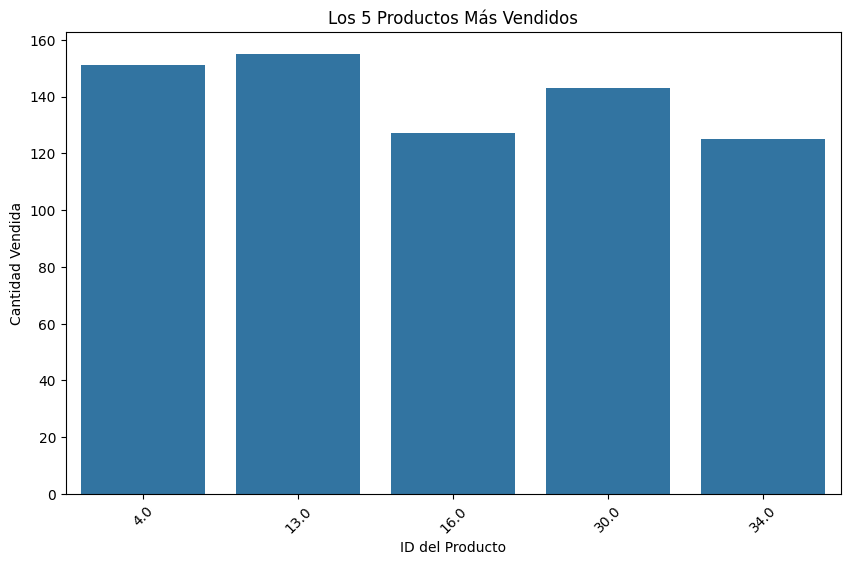

In [ ]:
#Gradica de los productos mas vendidos
plt.figure(figsize=(10, 6))
sns.barplot(x=productos_mas_vendidos.index, y=productos_mas_vendidos.values)
plt.xlabel('ID del Producto')
plt.ylabel('Cantidad Vendida')
plt.title('Los 5 Productos Más Vendidos')
plt.xticks(rotation=45)
plt.show()

<ipython-input-24-a3345ec49a6e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_mes.index, y=ventas_por_mes.values, palette=['y','r', 'y','r', 'y','r', 'y','r','y','r','y','r'])


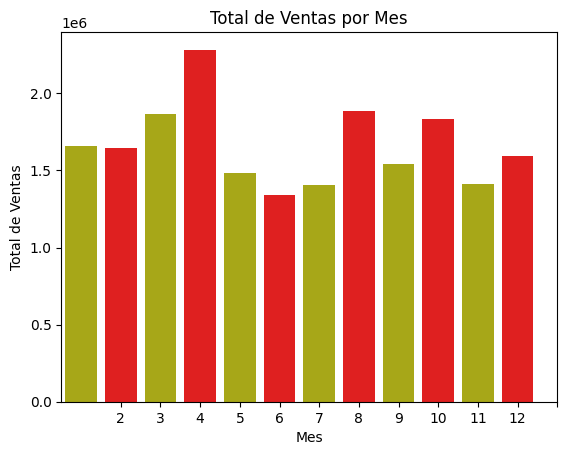

In [ ]:
#grafica de total de ventas por mes
hoja_ventas['fecha_venta'] = pd.to_datetime(hoja_ventas['fecha_venta'])
ventas_por_mes = hoja_ventas.groupby(hoja_ventas['fecha_venta'].dt.month)['precio_unitario'].sum()
# Use palette instead of color to set color for each bar
sns.barplot(x=ventas_por_mes.index, y=ventas_por_mes.values, palette=['y','r', 'y','r', 'y','r', 'y','r','y','r','y','r'])
plt.xlabel('Mes')
plt.ylabel('Total de Ventas')
plt.title('Total de Ventas por Mes')
plt.xticks(range(1, 13))
plt.show()


Text(0.5, 1.0, 'Evolución de Ventas en el Tiempo')

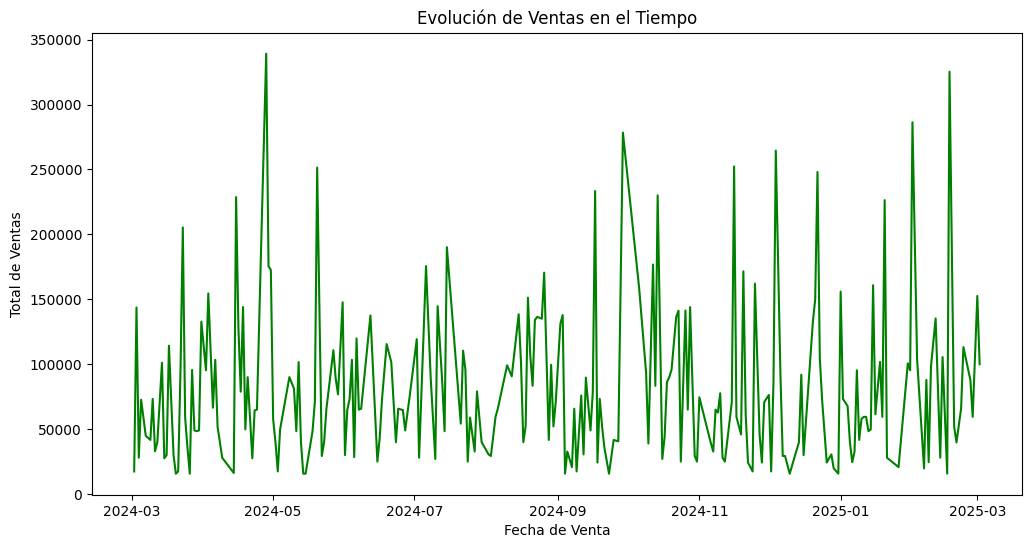

In [ ]:
#evolución de ventas en el tiempo
ventas_por_fecha = hoja_ventas.groupby('fecha_venta')['precio_unitario'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=ventas_por_fecha.index, y=ventas_por_fecha.values, color='green')
plt.xlabel('Fecha de Venta')
plt.ylabel('Total de Ventas')
plt.title('Evolución de Ventas en el Tiempo')

In [ ]:
#cual es la categoria que genera mas ingresos
hoja_ventas = hoja_ventas.merge(hoja_productos, on='id_producto', how='left', suffixes=('_ventas', '_productos'))
ingresos_por_categoria = hoja_ventas.groupby('categoria_productos')['precio_unitario'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=ingresos_por_categoria.index, y=ingresos_por_categoria.values, palette='viridis')
plt.xlabel('Categoría de Producto')
plt.ylabel('Total de Ingresos')
plt.title('Ingresos por Categoría de Producto')
plt.xticks(rotation=45)
plt.show()


MergeError: Passing 'suffixes' which cause duplicate columns {'nombre_producto_ventas', 'precio_ventas', 'categoria_ventas'} is not allowed.

In [ ]:
clientes_que_mas_compran = hoja_ventas.groupby('id_cliente')['id_cliente'].count().sort_values(ascending=False).head(5)
print(clientes_que_mas_compran)

id_cliente
2.0     21
23.0    19
17.0    19
1.0     16
3.0     16
Name: id_cliente, dtype: int64


<ipython-input-55-c4f02083ca4e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clientes_que_mas_compran.index, y=clientes_que_mas_compran.values, palette='viridis')


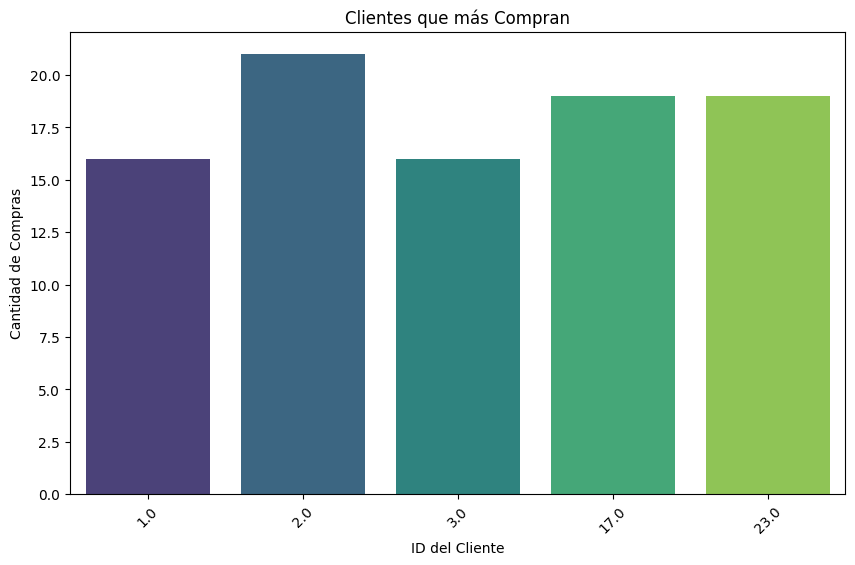

In [ ]:
#graficamos lo antetior
plt.figure(figsize=(10, 6))
sns.barplot(x=clientes_que_mas_compran.index, y=clientes_que_mas_compran.values, palette='viridis')
plt.xlabel('ID del Cliente')
plt.ylabel('Cantidad de Compras')
plt.title('Clientes que más Compran')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#desviación estandar de las ventas
desviacion_estandar = hoja_ventas['precio_unitario'].std()
print(f"La desviación estándar de las ventas es: {desviacion_estandar}")

La desviación estándar de las ventas es: 23975.509051335186


<Axes: xlabel='precio_unitario', ylabel='Count'>

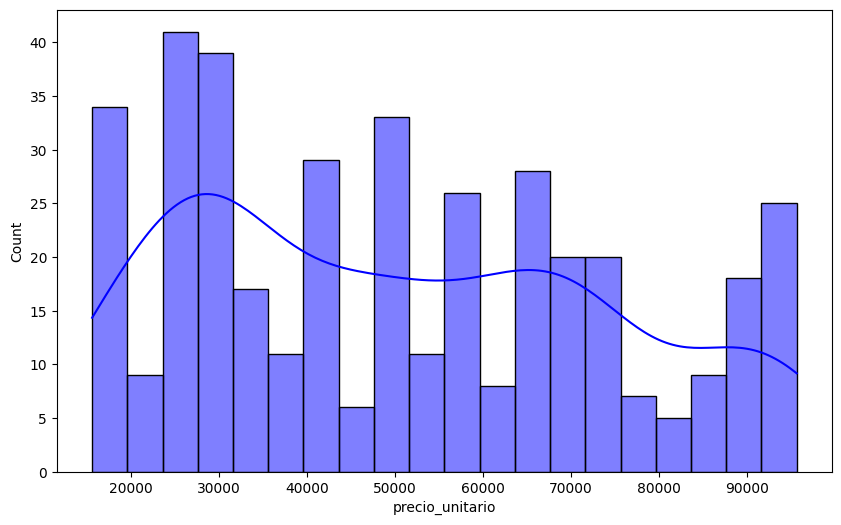

In [ ]:
#graficamos lo anterior
plt.figure(figsize=(10, 6))
sns.histplot(hoja_ventas['precio_unitario'], bins=20, kde=True, color='blue')
plt.xlabel('Precio Unitario')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios Unitarios')
plt.show()